In [94]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
from sklearn.linear_model import LinearRegression

In [95]:
s = np.array([27, 37, 42, 48, 57, 56, 77, 80])

p = np.array([1.2, 1.6, 1.8, 1.8, 2.5, 2.6, 3, 3.3])

n = 8

In [96]:
b1 = (n * np.sum(s * p) - np.sum(p) * np.sum(s)) / (n * np.sum(s**2) - np.sum(s)**2)
b1

0.03874584717607981

In [97]:
b1 = (np.mean(s * p) - np.mean(p) * np.mean(s)) / (np.mean(s**2) - np.mean(s)**2) # variant 2
b1

0.03874584717607981

In [98]:
b0 = np.mean(p) - b1 * np.mean(s)
b0

0.17147009966776983

In [99]:
y_pred =0.17147 + 0.038745 * s
y_pred

array([1.217585, 1.605035, 1.79876 , 2.03123 , 2.379935, 2.34119 ,
       3.154835, 3.27107 ])

Метод флрмулы потерь

In [100]:
mse = ((p - y_pred)**2).sum() / n #определим СКО
mse

0.020001559550000006

Матричны метод

In [101]:
x = s.reshape((8, 1))
x

array([[27],
       [37],
       [42],
       [48],
       [57],
       [56],
       [77],
       [80]])

In [102]:
y = p.reshape((8, 1))
y

array([[1.2],
       [1.6],
       [1.8],
       [1.8],
       [2.5],
       [2.6],
       [3. ],
       [3.3]])

In [103]:
r= np.ones((8,1))
r

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

#np.ones((8, 1))  создаем столбец едениц, np.hstack склеиваем вертикальные столбцы двух матриц np.vstack-  склеивает горизонтально

почемуто работает не так X = np.hstack([np.ones((8,1)), x]) формула из лекции добавляет лишний столбец единиц

In [104]:
# X = np.hstack([x])
X = np.hstack([np.ones((8,1)), x])
X

array([[ 1., 27.],
       [ 1., 37.],
       [ 1., 42.],
       [ 1., 48.],
       [ 1., 57.],
       [ 1., 56.],
       [ 1., 77.],
       [ 1., 80.]])

Поиск матрицы В состоящей из двух коэфф. b1, b0

In [105]:
D =  (X.T @ y)
D

array([[  17.8],
       [1036.7]])

In [106]:
T = np.dot(X.T, y) #тоже самое (X.T @ y)
T

array([[  17.8],
       [1036.7]])

In [107]:
G = np.dot(X.T, X)
G

array([[8.000e+00, 4.240e+02],
       [4.240e+02, 2.488e+04]])

In [108]:
C = np.linalg.inv(G)
C

array([[ 1.29152824e+00, -2.20099668e-02],
       [-2.20099668e-02,  4.15282392e-04]])

In [109]:
B = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T @ y)
B

array([[0.1714701 ],
       [0.03874585]])

array([[0.1714701 ],
       [0.03874585]]) получили  b0 fnd b1

Градиентный спуск, обучаемая задача 

для y_pred = B1 * x

In [110]:
x = np.array([27, 37, 42, 48, 57, 56, 77, 80])

y = np.array([1.2, 1.6, 1.8, 1.8, 2.5, 2.6, 3, 3.3])


In [111]:
def mse_(B1, y = y, x = x, n = 8): # определяем СКО 
    return np.sum((B1 * x - y)**2) / n

In [112]:
# находим производную СКО

# mse = 1/n * np.sum((B1 * x - y)**2)
# mse = (2/n) * np.sum((B1 * X - y) * X)

In [113]:
alpha = 1e-6 # 1*10**-6 скорость обучения, нужно задать не очень большую и не маленькую - одна миллионнаяб, если взять маленкий то будет долгий подбор, если большой то проскочем минимум

B1 = 0.1 #задаем стартовое значение коэффициента

n = 8


alpha

1e-06

In [116]:
for i in range(10):
    B1 -= alpha * (2/n) * np.sum((B1 * x - y) * x)
    print('B1 = {}'.format(B1))

B1 = 0.09963717500000001
B1 = 0.0992766067715
B1 = 0.09891828127738128
B1 = 0.09856218456783597
B1 = 0.09820830277982404
B1 = 0.09785662213653352
B1 = 0.09750712894684428
B1 = 0.09715980960479491
B1 = 0.09681465058905309
B1 = 0.09647163846238918


In [117]:
for i in range(3000):
    B1 -= alpha * (2/n) * np.sum((B1 * x - y) * x)
    if i % 500 == 0:
        print('Iteretion = {i}, B1 = {B1}, mse = {mse}'.format(i = i, B1 = B1, mse = mse_(B1)))

Iteretion = 0, B1 = 0.09613075987115312, mse = 9.247702819884381
Iteretion = 500, B1 = 0.04407361917387843, mse = 0.04084470164149809
Iteretion = 1000, B1 = 0.041774262033161175, mse = 0.022882329326759373
Iteretion = 1500, B1 = 0.041672699727015455, mse = 0.022847285143930744
Iteretion = 2000, B1 = 0.04166821373314919, mse = 0.022847216773521282
Iteretion = 2500, B1 = 0.041668015587382985, mse = 0.022847216640132135


In [ ]:
mse_(0.0423698)


0.024378935844400013

подгружаемые модели

In [ ]:
model = LinearRegression() #задаем модель линейной регрессии
s1 = np.array([27, 37, 42, 48, 57, 56, 77, 80])

p1 = np.array([1.2, 1.6, 1.8, 1.8, 2.5, 2.6, 3, 3.3])

s2 = s1.reshape(-1,1) #делаем массив двумерным
p2 = p1.reshape(-1,1)
p2

array([[1.2],
       [1.6],
       [1.8],
       [1.8],
       [2.5],
       [2.6],
       [3. ],
       [3.3]])

In [ ]:
regres = model.fit(s2, p1)

print(regres.intercept_)
print(regres.coef_)


0.1714700996677747
[0.03874585]


0.1714700996677747   [0.03874585] B0 и B1

In [ ]:
y_pred1 = model.predict(s2)
y_pred1

array([1.21760797, 1.60506645, 1.79879568, 2.03127076, 2.37998339,
       2.34123754, 3.15490033, 3.27113787])

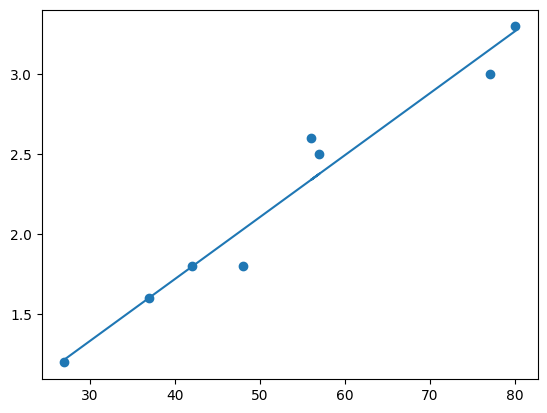

In [ ]:
plt.scatter(s1, p1)
plt.plot(s1, y_pred1) #наши предсказанные данные
plt.show()

In [ ]:
df = pd.DataFrame({'реальные': p1, 'праедсказанные': y_pred1})
df

,реальные,праедсказанные
0,1.2,1.217608
1,1.6,1.605066
2,1.8,1.798796
3,1.8,2.031271
4,2.5,2.379983
5,2.6,2.341238
6,3.0,3.154900
7,3.3,3.271138


Коэффициент детерминации R^2 - это квадрат коэффициента корреляции

Детерминация - описывает степень каччества модели. может быть в интервале [1,0], чем ближе к 1 тем лучше модель

доля изменчивости Y

In [ ]:
r = np.corrcoef(s1, p1)
r # 0.97857682 корреляция

array([[1.        , 0.97857682],
       [0.97857682, 1.        ]])

In [ ]:
R = r**2
R # 0.95761259 Детерминация - описывает степень каччества модели. может быть в интервале [1,0], чем ближе к 1 тем лучше модель

array([[1.        , 0.95761259],
       [0.95761259, 1.        ]])

In [ ]:
regres.score(s2, p1) # 0.95761259 Детерминация - можно сравнивать модели

0.957612593782315

In [ ]:
regres.score(y_pred1.reshape(-1, 1), p1)

-8.12929578899535

In [ ]:
regres.score(s2, y_pred1) #cool

1.0


## Оценка значимости модели

формула аналог,  тоже Фишер  F = (R^2 / m) / (1 - R^2)*(n - m - 1)
n -  число наблюдений , m - число факторов

критерий Фишера F = MSf / MSo

MSf = SSF / df1
MSo = SSo / df2

df1 = p - 1 (p число параметров, у нас площадь и цена = 2)
df2 = n - p ( n число парных измкрений = 8)

In [ ]:
alpha = 0.05

df1= 1
df2= 6

SSf = np.sum((y_pred - np.mean(p))**2)
SSf

3.6148294763999997

In [ ]:
SSo = np.sum((p - y_pred)**2)
SSo

0.16001247640000005

In [ ]:
F = SSf / SSo
F

22.590922643829533

In [ ]:
F_= st.f.ppf(1-alpha, 1, 6)
F_

5.987377607273699